Making a time series forecasting with the Help of ARIMA Model. 

more about ARIMA Model can be found out at: https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/


ARIMA, short for ‘AutoRegressive Integrated Moving Average’, is a forecasting algorithm based on the idea that the information in the past values of the time series can alone be used to predict the future values.

In [1]:
!pip install pmdarima
!pip install nsepy

     |████████████████████████████████| 1.5MB 5.9MB/s 
     |████████████████████████████████| 2.1MB 32.1MB/s 
     |████████████████████████████████| 9.5MB 40.0MB/s 
  Found existing installation: Cython 0.29.22
    Uninstalling Cython-0.29.22:
      Successfully uninstalled Cython-0.29.22
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Created wheel for nsepy: filename=nsepy-0.8-cp37-none-any.whl size=36083 sha256=e9710bbb546e9a52e9f942266b393d06ec770dde2bad05e2926f04268ef53035
  Stored in directory: /root/.cache/pip/wheels/05/2c/72/5324e267426eea65dec0c21a12a48b15887c0cf686c7a8fe11
Successfully built nsepy


In [2]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
from nsepy import get_history
import datetime

In [ ]:
sbin = get_history(symbol='SBIN',
                    start=datetime.date(2015,1,1), 
                    end=datetime.date.today())
sbin

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
df = pd.read_csv('/content/drive/MyDrive/Mini Project Sem 6/HDFC_data.csv')
df = df[['Date', 'Close']]
df.index = df['Date']
df.index = pd.to_datetime(df.index)
df.drop(['Date'], axis=1)

,Close
Date,
2013-01-01,832.95
2013-01-02,846.60
2013-01-03,845.50
2013-01-04,837.70
2013-01-07,822.95
...,...
2021-03-19,2531.65
2021-03-22,2531.85
2021-03-23,2509.90


In [48]:

from statsmodels.tsa.stattools import adfuller

def ad_test(dataset):
	dftest = adfuller(dataset, autolag='AIC')
	print("1. ADF ", dftest[0])
	print("2. P value: ", dftest[1])
	print("3. Num of Lags : ", dftest[2])
	print("4. Num of obs used for adf regression and critical values Calculation: ", dftest[3])
	print("5. Critical Values: ", dftest[4])

	for key, val in dftest[4].items():
		print("\t", key, " : ", val)



ad_test(df.Close)



1. ADF  -0.8307616080478948
2. P value:  0.8099186836427368
3. Num of Lags :  12
4. Num of obs used for adf regression and critical values Calculation:  2025
5. Critical Values:  {'1%': -3.433583387038847, '5%': -2.862968345989414, '10%': -2.5675303887212313}
	 1%  :  -3.433583387038847
	 5%  :  -2.862968345989414
	 10%  :  -2.5675303887212313


In [49]:

from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")


stepwise_fir = auto_arima(df.Close, trace=True, supress_warnings=True)
stepwise_fir.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=19628.590, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=19653.349, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=19655.349, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=19655.348, Time=0.49 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=19652.803, Time=0.07 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=19644.186, Time=1.11 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=19642.977, Time=1.51 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=19621.976, Time=4.64 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=19637.262, Time=1.35 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=19607.397, Time=5.54 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=19629.183, Time=3.33 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=19603.710, Time=6.56 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=19619.147, Time=3.49 sec
 ARIMA(5,1,3)(0,0,0)[0] intercept   : AIC=19607.966, Time=7.80 sec
 ARIMA(4,1,3)(0,0,0

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2038
Model:               SARIMAX(5, 1, 2)   Log Likelihood               -9793.574
Date:                Thu, 25 Mar 2021   AIC                          19603.149
Time:                        18:30:38   BIC                          19648.103
Sample:                             0   HQIC                         19619.640
                               - 2038                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.4722      0.033    -44.771      0.000      -1.537      -1.408
ar.L2         -0.8959      0.037    -24.193      0.000      -0.968      -0.823
ar.L3         -0.1765      0.026     -6.917      0.000      -0.227      -0.127
ar.L4         -0.2230      0.021    -10.527      0.000      -0.264      -0.181
ar.L5         -0.0725      0.014     -5.183      0.000      -0.100      -0.045
ma.L1          1.4807      0.030     48.989      0.000       1.421       1.540
ma.L2          0.8482      0.027     31.384      0.000       0.795       0.901
sigma2       878.0904     13.472     65.177      0.000     851.685     904.496
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5971.17
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               5.30   Skew:                            -0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:



from statsmodels.tsa.arima_model import ARIMA


print(df.shape)
train=df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)
model = ARIMA(train.Close, order=(5,1,3))
model = model.fit()
print(model.summary())


(2038, 2)
(2008, 2) (30, 2)
                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 2007
Model:                 ARIMA(5, 1, 3)   Log Likelihood               -9211.727
Method:                       css-mle   S.D. of innovations             23.827
Date:                Thu, 25 Mar 2021   AIC                          18443.454
Time:                        18:26:07   BIC                          18499.498
Sample:                             1   HQIC                         18464.029
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3855      0.508      0.759      0.448      -0.610       1.381
ar.L1.D.Close    -0.3619      0.110     -3.303      0.001      -0.577      -0.147
ar.L2.D.Clos

                  Date   Close
Date                          
2021-02-11  2021-02-11  935.20
2021-02-12  2021-02-12  929.95
2021-02-15  2021-02-15  932.20
2021-02-16  2021-02-16  935.85
2021-02-17  2021-02-17  922.15
2021-02-18  2021-02-18  911.70
2021-02-19  2021-02-19  888.55
2021-02-22  2021-02-22  856.40
2021-02-23  2021-02-23  853.60
2021-02-24  2021-02-24  862.00
2021-02-25  2021-02-25  863.25
2021-02-26  2021-02-26  855.20
2021-03-01  2021-03-01  873.65
2021-03-02  2021-03-02  885.90
2021-03-03  2021-03-03  880.50
2021-03-04  2021-03-04  874.90
2021-03-05  2021-03-05  862.80
2021-03-08  2021-03-08  862.70
2021-03-09  2021-03-09  852.95
2021-03-10  2021-03-10  857.30
2021-03-12  2021-03-12  848.25
2021-03-15  2021-03-15  835.30
2021-03-16  2021-03-16  840.95
2021-03-17  2021-03-17  839.30
2021-03-18  2021-03-18  807.90
2021-03-19  2021-03-19  822.25
2021-03-22  2021-03-22  835.25
2021-03-23  2021-03-23  846.15
2021-03-24  2021-03-24  855.85
2021-03-25  2021-03-25  840.15


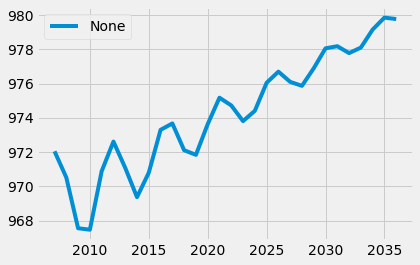

In [32]:

start = len(train)
end = len(train)+ len(test) -1
pred = model.predict(start=start, end=end, typ="levels")
# print(pred)
# pred.index = df.index[start:end+1]
pred.plot(legend=True)
print(test)
# test['Close'].plot()
# plt.show()


In [33]:

print(test.Close.mean())
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred, test.Close))
print("The rmse is ", rmse)


868.9366666666667
The rmse is  111.55593215770924


In [35]:

print(type(df.Close))
model2 = ARIMA(df.Close, order=(5,1,3))
model2 = model2.fit()
print(df.tail())



<class 'pandas.core.series.Series'>
                  Date   Close
Date                          
2021-03-19  2021-03-19  822.25
2021-03-22  2021-03-22  835.25
2021-03-23  2021-03-23  846.15
2021-03-24  2021-03-24  855.85
2021-03-25  2021-03-25  840.15


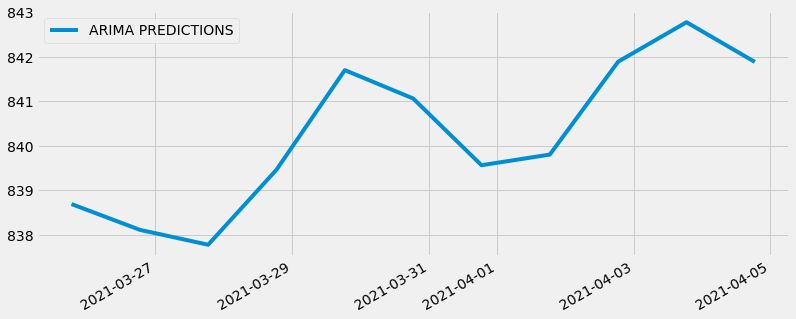

In [52]:


import datetime as dt
# Future dates
index_future_dates = pd.date_range(start = dt.datetime.now() , end=dt.datetime.now() + dt.timedelta(days=10))

# print(index_future_dates)
pred = model2.predict(start=len(df), end=len(df)+10, typ='levels').rename('ARIMA PREDICTIONS')

pred.index = index_future_dates
pred.plot(figsize=(12,5), legend =True)


In [23]:
model2.save('HDFC_model.pkl')